In [ ]:
import pandas as pd
import numpy as np 
import os
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import PReLU
from tensorflow.keras.optimizers import RMSprop

from tensorflow.keras.callbacks import ReduceLROnPlateau

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!unzip  '/content/drive/My Drive/Colab_Dataset/Dataset2.zip'

Archive:  /content/drive/My Drive/Colab_Dataset/Dataset2.zip
  inflating: COVID/Covid (1).png     
  inflating: COVID/Covid (10).png    
  inflating: COVID/Covid (100).png   
  inflating: COVID/Covid (1000).png  
  inflating: COVID/Covid (1001).png  
  inflating: COVID/Covid (1002).png  
  inflating: COVID/Covid (1003).png  
  inflating: COVID/Covid (1004).png  
  inflating: COVID/Covid (1005).png  
  inflating: COVID/Covid (1006).png  
  inflating: COVID/Covid (1007).png  
  inflating: COVID/Covid (1008).png  
  inflating: COVID/Covid (1009).png  
  inflating: COVID/Covid (101).png   
  inflating: COVID/Covid (1010).png  
  inflating: COVID/Covid (1011).png  
  inflating: COVID/Covid (1012).png  
  inflating: COVID/Covid (1013).png  
  inflating: COVID/Covid (1014).png  
  inflating: COVID/Covid (1015).png  
  inflating: COVID/Covid (1016).png  
  inflating: COVID/Covid (1017).png  
  inflating: COVID/Covid (1018).png  
  inflating: COVID/Covid (1019).png  
  inflating: COVID/Covid (1

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import PIL
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Input, InputLayer, Dense, Flatten, Conv2D,Activation, BatchNormalization, Conv2D, Dropout,GlobalAveragePooling2D
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import  Model, Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from keras.utils.np_utils import to_categorical

import pandas as pd
import numpy as np
import os, cv2
import random
import scipy
import math
import seaborn as sns
color = sns.color_palette()

In [ ]:
image_name = []
image_label = []

for file in os.listdir('COVID'):
    filename, fileextension = os.path.splitext(file)     
    if(fileextension == '.png'):
        file_path = 'COVID' + '/' + file
        image_name.append(file_path)
        image_label.append(1)
        
        
for file in os.listdir('non-COVID'):
    filename, fileextension = os.path.splitext(file)
    if(fileextension == '.png'):
        file_path = 'non-COVID' + '/' + file
        image_name.append(file_path)
        image_label.append(0)
        


WIDTH = 224
HEIGHT = 224
def process_image():
    #Return two array. One of resized images and other of array of labels
    x = []  # array of images
    y = []  # array of labels
   
    
    for i in range(0,len(image_name)):
        #Read and resize image
        full_size_image = cv2.imread(image_name[i])
        x.append(cv2.resize(full_size_image,(WIDTH, HEIGHT),interpolation=cv2.INTER_CUBIC));
        # Labels
        y.append(image_label[i])
        
    return x,y

x,y = process_image()


x = np.asarray(x)
y = np.asarray(y)
y = to_categorical(y, 2)
print('Shape of x: ',x.shape, '  Shape of y: ', y.shape)
print('Dimension of x: ', x.ndim, '  Dimension of y: ', y.ndim)
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)
print('Shape of X_train: ',X_train.shape, '  Shape of y_train: ', y_train.shape)
print('Shape of X_test: ',X_test.shape, '  Shape of y_test: ', y_test.shape)


Shape of x:  (2481, 224, 224, 3)   Shape of y:  (2481, 2)
Dimension of x:  4   Dimension of y:  2
Shape of X_train:  (1984, 224, 224, 3)   Shape of y_train:  (1984, 2)
Shape of X_test:  (497, 224, 224, 3)   Shape of y_test:  (497, 2)


In [ ]:
#FEEDING DATA INTO THE MODEL
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

train_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    #zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode="nearest"
)


test_datagen = ImageDataGenerator(
    rescale = 1.0/255.0)

BATCH_SIZE = 32
train_generator = train_datagen.flow(X_train,y_train, batch_size = BATCH_SIZE)


test_generator = test_datagen.flow(X_test,y_test, batch_size = BATCH_SIZE)


In [ ]:
image_width=224
image_height=224
no_of_channels=3
input_shape=(image_width,image_height,no_of_channels)

**Importing 3 pre-trained model** 

**VGG16**


In [ ]:
our_vgg16 = tf.keras.models.load_model('/content/drive/My Drive/Colab Notebooks/our_vgg16.h5')
our_resnet50 = tf.keras.models.load_model('/content/drive/My Drive/Colab Notebooks/our_resnet50.h5')
our_xception = tf.keras.models.load_model('/content/drive/My Drive/Colab Notebooks/our_xception.h5')

In [ ]:
our_vgg16.trainable = False
our_resnet50.trainable = False
our_xception.trainable = False

In [ ]:
our_vgg16.summary()

Model: "Predict"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
our_resnet50.summary()

Model: "Predict"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
our_xception.summary()

Model: "Our_Xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
_______________________________________________________________________________________

In [ ]:
members=[our_vgg16, our_resnet50,our_xception]

In [ ]:
def stacking_ensemble(members,input_shape,n_classes):
  commonInput = Input(shape=input_shape)
  out=[]

  for model in members:
    #model._name= model._name+"test"+ str(members.index(model)+1)
    model._name= model.get_layer(index = 0)._name +"-test"+ str(members.index(model)+1)
    out.append(model(commonInput))

  modeltmp = concatenate(out,axis=-1)
  modeltmp = Dense(64, activation='relu')(modeltmp)
  #modeltmp = Dense(128, activation='relu')(modeltmp)
  modeltmp = Dense(n_classes, activation='softmax')(modeltmp)
  stacked_model = Model(commonInput,modeltmp)
  stacked_model.compile( loss='categorical_crossentropy',optimizer= optimizer, metrics=['accuracy'])

  return stacked_model


In [ ]:
n_classes=2
epochs=50
batch=32
optimizer= Adam(lr=5e-5, beta_1=0.9, beta_2=0.999)

stacked_model= stacking_ensemble(members,(image_height,image_width,3),n_classes)

In [ ]:
reduce_learning_rate = ReduceLROnPlateau(monitor='loss',
                                         factor=0.1,
                                         patience=2,
                                         cooldown=2,
                                         min_lr=1e-10,
                                         verbose=1)



#early = EarlyStopping(monitor='val_accuracy', patience=30, verbose=1, mode='auto')
callbacks = [reduce_learning_rate]

In [ ]:
stacked_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
input_1-test1 (Functional)      (None, 2)            41034054    input_1[0][0]                    
__________________________________________________________________________________________________
input_4-test2 (Functional)      (None, 2)            50984066    input_1[0][0]                    
__________________________________________________________________________________________________
input_3-test3 (Functional)      (None, 2)            30447082    input_1[0][0]                    
_______________________________________________________________________________________

In [ ]:
#generator=MultipleInputGenerator(X_train,X_train,y_train,batch)
history_1=stacked_model.fit(train_generator,
                            epochs=100, #epochs,
                            verbose=1,
                            validation_data=test_generator,
                            callbacks=callbacks)

Epoch 1/100
62/62 [==============================] - 30s 489ms/step - loss: 0.6866 - accuracy: 0.4894 - val_loss: 0.6469 - val_accuracy: 0.5191
Epoch 2/100
62/62 [==============================] - 28s 458ms/step - loss: 0.6331 - accuracy: 0.4894 - val_loss: 0.5967 - val_accuracy: 0.5191
Epoch 3/100
62/62 [==============================] - 30s 479ms/step - loss: 0.5848 - accuracy: 0.4894 - val_loss: 0.5515 - val_accuracy: 0.5191
Epoch 4/100
62/62 [==============================] - 29s 468ms/step - loss: 0.5401 - accuracy: 0.7434 - val_loss: 0.5091 - val_accuracy: 0.9859
Epoch 5/100
62/62 [==============================] - 29s 469ms/step - loss: 0.4984 - accuracy: 0.9889 - val_loss: 0.4697 - val_accuracy: 0.9899
Epoch 6/100
62/62 [==============================] - 29s 476ms/step - loss: 0.4609 - accuracy: 0.9879 - val_loss: 0.4336 - val_accuracy: 0.9899
Epoch 7/100
62/62 [==============================] - 29s 471ms/step - loss: 0.4247 - accuracy: 0.9924 - val_loss: 0.3998 - val_accuracy:

In [ ]:
stacked_model.evaluate(test_generator)

16/16 [==============================] - 5s 338ms/step - loss: 0.0152 - accuracy: 1.0000


[0.01521595474332571, 1.0]

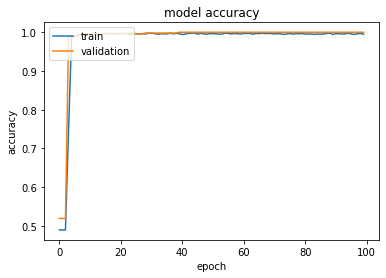

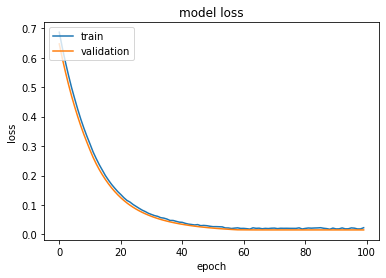

In [ ]:
#  "Accuracy"
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Save ensembed model
stacked_model.save('/content/drive/My Drive/Colab_Dataset/stacked_model.h5')